In [1]:
# import yahoo finance package
!pip install yfinance

In [2]:
# import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# define tickers
nifty500 = "^CRSLDX"
sp500 = "^GSPC"

In [4]:
# set dates

start_date = "2004-01-01"
end_date = "2024-01-01"


In [5]:
# download data from yfinance

nifty500_data = yf.download(nifty500, start=start_date, end=end_date, interval="1d")
sp500_data = yf.download(sp500, start=start_date, end=end_date, interval="1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# display the first few rows

print("this is Nifty 500 data: ")

print(nifty500_data.head())

print("this is S&P 500 data: ")

print(sp500_data.head())

this is Nifty 500 data: 
Price             Close         High          Low         Open  Volume
Ticker          ^CRSLDX      ^CRSLDX      ^CRSLDX      ^CRSLDX ^CRSLDX
Date                                                                  
2005-09-26  2245.396973  2247.497068  2195.747135  2195.747135       0
2005-09-27  2259.347168  2274.797099  2241.297143  2246.247087       0
2005-09-28  2280.347168  2282.396970  2250.647011  2261.297144       0
2005-09-29  2281.747070  2302.297093  2275.547127  2289.547109       0
2005-09-30  2273.997070  2284.896959  2242.847208  2284.097155       0
this is S&P 500 data: 
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2004-01-02  1108.479980  1118.849976  1105.079956  1111.920044  1153200000
2004-01-05  1122.219971  1122.219971  1108.479980  1108.479980  1578200000
2004-01-0

In [7]:
nifty500_data.shape


(4494, 5)

In [8]:
sp500_data.shape

(5033, 5)

In [9]:

sp500_data.tail()


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000
2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2748450000
2023-12-28,4783.350098,4793.299805,4780.979980,4786.439941,2698860000
2023-12-29,4769.830078,4788.430176,4751.990234,4782.879883,3126060000


In [10]:
nifty500_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,^CRSLDX,^CRSLDX,^CRSLDX,^CRSLDX,^CRSLDX
Date,,,,,
2023-12-22,19054.699219,19089.949219,18934.750000,19011.250000,26069600
2023-12-26,19148.849609,19173.800781,19059.400391,19095.000000,22132200
2023-12-27,19296.949219,19312.300781,19189.800781,19219.400391,20854200
2023-12-28,19399.250000,19414.550781,19313.099609,19358.349609,32391400
2023-12-29,19429.150391,19450.099609,19338.349609,19394.500000,42430900


In [11]:
# checking for missing values
nifty500_data.isnull().sum()

,,0
Price,Ticker,
Close,^CRSLDX,0
High,^CRSLDX,0
Low,^CRSLDX,0
Open,^CRSLDX,0
Volume,^CRSLDX,0


In [12]:
sp500_data.isnull().sum()

,,0
Price,Ticker,
Close,^GSPC,0
High,^GSPC,0
Low,^GSPC,0
Open,^GSPC,0
Volume,^GSPC,0


In [13]:
#Confirm index is datetime
print("Index type for Nifty 500:", type(nifty500_data.index))
print("Index type for S&P 500:", type(sp500_data.index))

Index type for Nifty 500: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index type for S&P 500: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


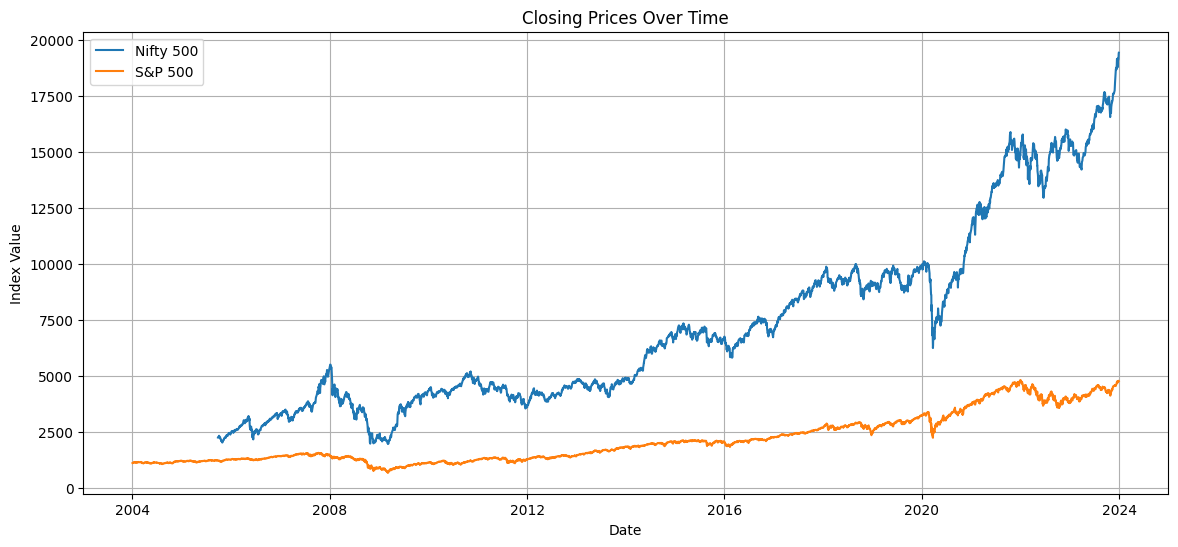

In [16]:
# plot closing prices

plt.figure(figsize=(14, 6))
plt.plot(nifty500_data['Close'], label='Nifty 500')
plt.plot(sp500_data['Close'], label='S&P 500')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid(True)
plt.show()


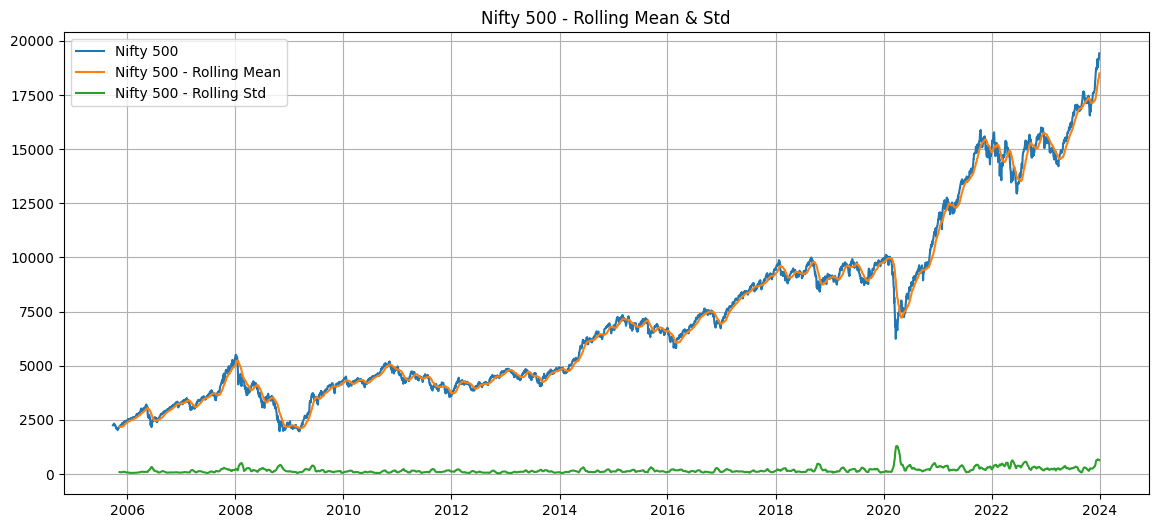

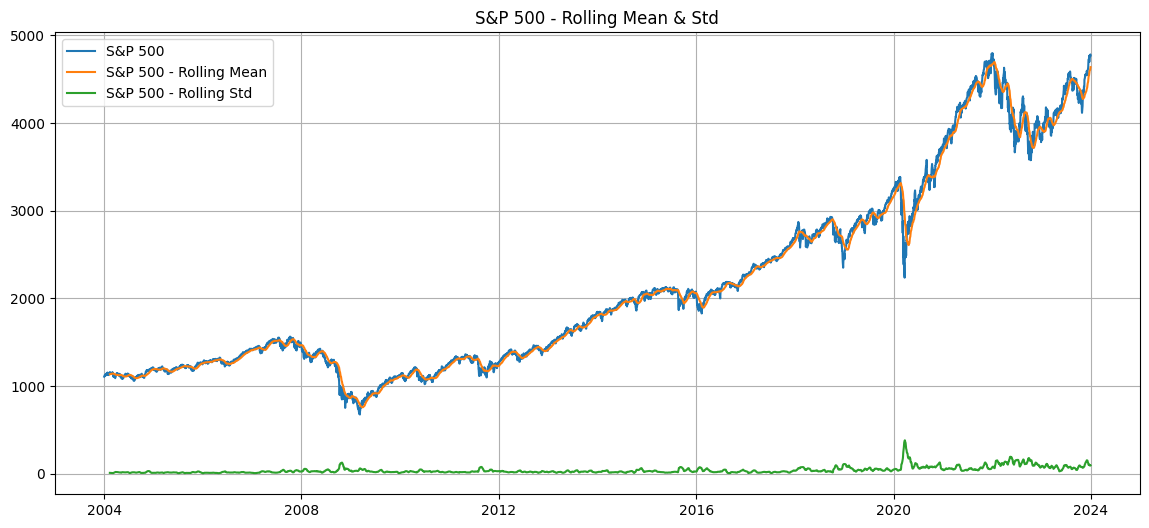

In [17]:
#  Plot rolling mean and standard deviation
nifty_rolling_mean = nifty500_data['Close'].rolling(window=30).mean()
nifty_rolling_std = nifty500_data['Close'].rolling(window=30).std()

sp_rolling_mean = sp500_data['Close'].rolling(window=30).mean()
sp_rolling_std = sp500_data['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(nifty500_data['Close'], label='Nifty 500')
plt.plot(nifty_rolling_mean, label='Nifty 500 - Rolling Mean')
plt.plot(nifty_rolling_std, label='Nifty 500 - Rolling Std')
plt.title("Nifty 500 - Rolling Mean & Std")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(sp500_data['Close'], label='S&P 500')
plt.plot(sp_rolling_mean, label='S&P 500 - Rolling Mean')
plt.plot(sp_rolling_std, label='S&P 500 - Rolling Std')
plt.title("S&P 500 - Rolling Mean & Std")
plt.legend()
plt.grid(True)
plt.show()


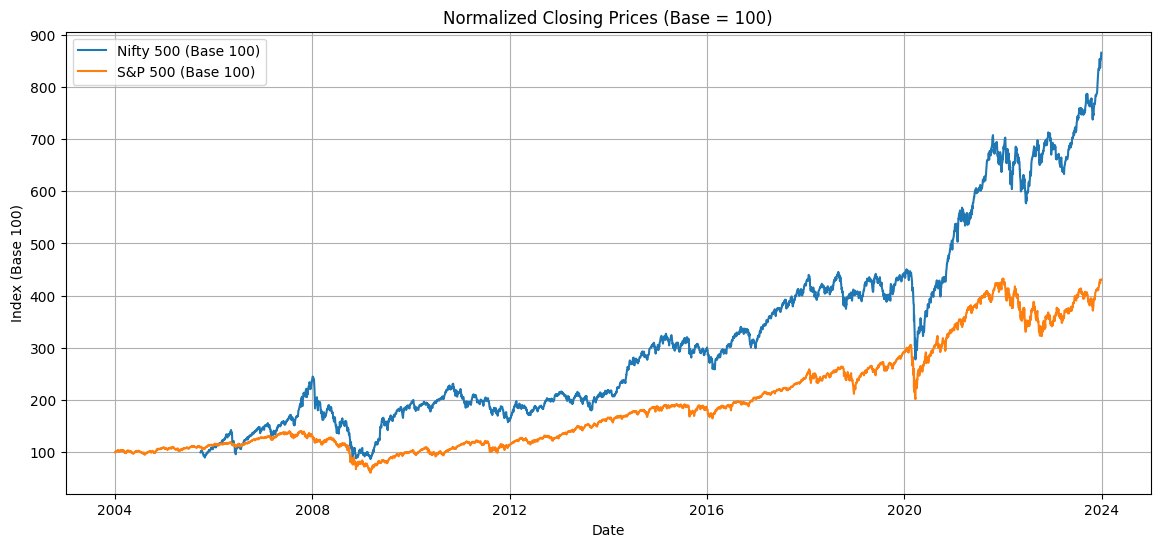

In [18]:
# Create new DataFrames with normalized close prices
nifty_base_100 = (nifty500_data['Close'] / nifty500_data['Close'].iloc[0]) * 100
sp_base_100 = (sp500_data['Close'] / sp500_data['Close'].iloc[0]) * 100

# Plot normalized series
plt.figure(figsize=(14, 6))
plt.plot(nifty_base_100, label='Nifty 500 (Base 100)')
plt.plot(sp_base_100, label='S&P 500 (Base 100)')
plt.title("Normalized Closing Prices (Base = 100)")
plt.xlabel("Date")
plt.ylabel("Index (Base 100)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, label=''):
    result = adfuller(series.dropna())
    print(f"ADF Test for {label}")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"P-Value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")
    print("-" * 40)

# Run ADF test on closing prices
adf_test(nifty500_data['Close'], label='Nifty 500')
adf_test(sp500_data['Close'], label='S&P 500')


ADF Test for Nifty 500
Test Statistic: 1.6601
P-Value: 0.9980
Non-stationary
----------------------------------------
ADF Test for S&P 500
Test Statistic: 1.1419
P-Value: 0.9956
Non-stationary
----------------------------------------


In [20]:
nifty_diff = nifty500_data['Close'].diff().dropna()
sp_diff = sp500_data['Close'].diff().dropna()


In [21]:
adf_test(nifty_diff, label='Nifty 500 (1st Difference)')
adf_test(sp_diff, label='S&P 500 (1st Difference)')


ADF Test for Nifty 500 (1st Difference)
Test Statistic: -14.7808
P-Value: 0.0000
Stationary
----------------------------------------
ADF Test for S&P 500 (1st Difference)
Test Statistic: -14.2400
P-Value: 0.0000
Stationary
----------------------------------------


In [22]:
!pip install ruptures


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.6 MB/s eta 0:00:00


<Figure size 1400x500 with 0 Axes>

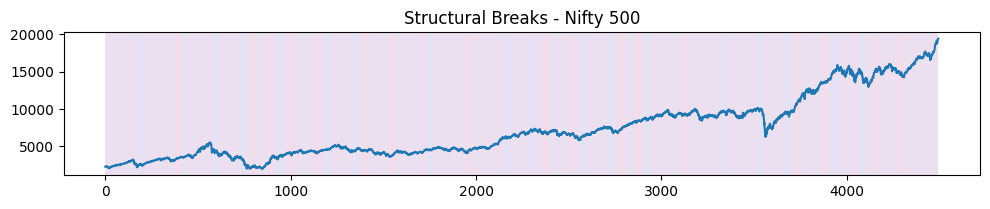

<Figure size 1400x500 with 0 Axes>

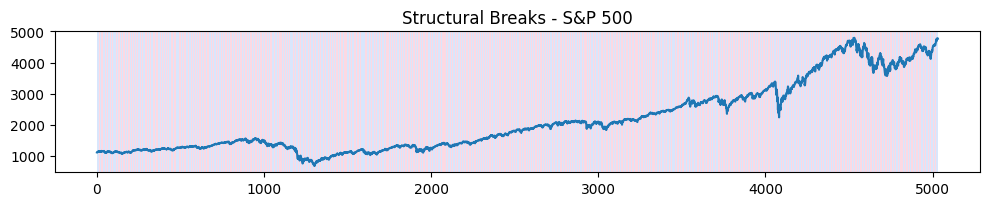

In [23]:
import ruptures as rpt

# Convert to numpy series
nifty_series = nifty500_data['Close'].dropna().values
sp_series = sp500_data['Close'].dropna().values

# Use Pelt method with cost="l2" for change in mean
model = rpt.Pelt(model="l2").fit(nifty_series)
nifty_breaks = model.predict(pen=10)

model = rpt.Pelt(model="l2").fit(sp_series)
sp_breaks = model.predict(pen=10)

# Plot breakpoints
plt.figure(figsize=(14, 5))
rpt.display(nifty_series, nifty_breaks)
plt.title("Structural Breaks - Nifty 500")
plt.show()

plt.figure(figsize=(14, 5))
rpt.display(sp_series, sp_breaks)
plt.title("Structural Breaks - S&P 500")
plt.show()


In [25]:
import ruptures as rpt

# Clean and prepare data
nifty_series = nifty500_data['Close'].dropna()
sp_series = sp500_data['Close'].dropna()

nifty_dates = nifty_series.index
sp_dates = sp_series.index

nifty_values = nifty_series.values
sp_values = sp_series.values

# Use Binary Segmentation to detect 10 breakpoints
nifty_model = rpt.Binseg(model="l2").fit(nifty_values)
nifty_breaks = nifty_model.predict(n_bkps=10)

sp_model = rpt.Binseg(model="l2").fit(sp_values)
sp_breaks = sp_model.predict(n_bkps=10)

# Map breakpoints to actual dates
nifty_break_dates = [nifty_dates[i] for i in nifty_breaks[:-1]]  # exclude last index
sp_break_dates = [sp_dates[i] for i in sp_breaks[:-1]]

# Print results
print("Top 10 Structural Break Dates - Nifty 500:")
for date in nifty_break_dates:
    print(date.date())

print("\nTop 10 Structural Break Dates - S&P 500:")
for date in sp_break_dates:
    print(date.date())

# Compare overlapping or nearby dates (within ±30 days)
print("\nSimilar Break Dates (within ±30 days):")
for nifty_date in nifty_break_dates:
    for sp_date in sp_break_dates:
        if abs((nifty_date - sp_date).days) <= 30:
            print(f"Nifty: {nifty_date.date()}  |  S&P: {sp_date.date()}")


Top 10 Structural Break Dates - Nifty 500:
2006-10-16
2008-09-15
2009-09-07
2014-05-09
2016-06-30
2017-04-25
2020-11-10
2021-02-02
2021-08-05
2023-06-01

Top 10 Structural Break Dates - S&P 500:
2006-08-30
2008-09-24
2009-09-15
2012-02-01
2013-07-10
2016-07-08
2017-09-29
2019-06-18
2020-11-11
2021-03-31

Similar Break Dates (within ±30 days):
Nifty: 2008-09-15  |  S&P: 2008-09-24
Nifty: 2009-09-07  |  S&P: 2009-09-15
Nifty: 2016-06-30  |  S&P: 2016-07-08
Nifty: 2020-11-10  |  S&P: 2020-11-11


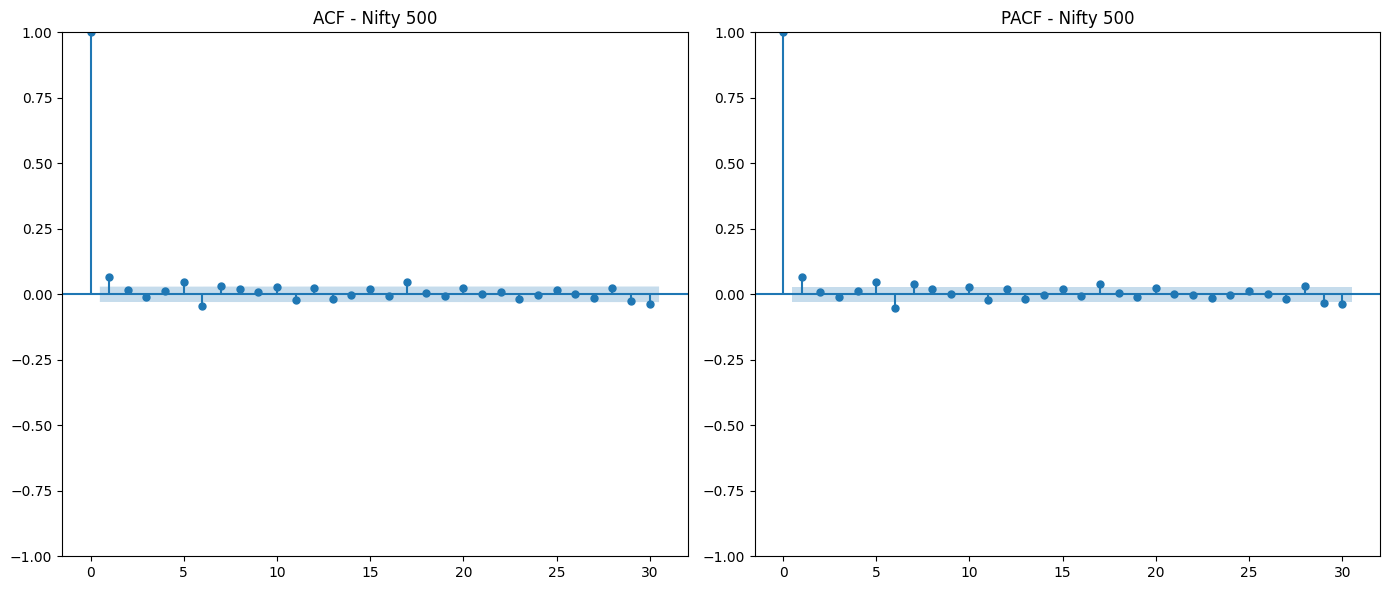

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for Nifty 500 (1st differenced)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(nifty_diff, lags=30, ax=plt.gca())
plt.title("ACF - Nifty 500")

plt.subplot(1, 2, 2)
plot_pacf(nifty_diff, lags=30, ax=plt.gca(), method="ywm")
plt.title("PACF - Nifty 500")
plt.tight_layout()
plt.show()


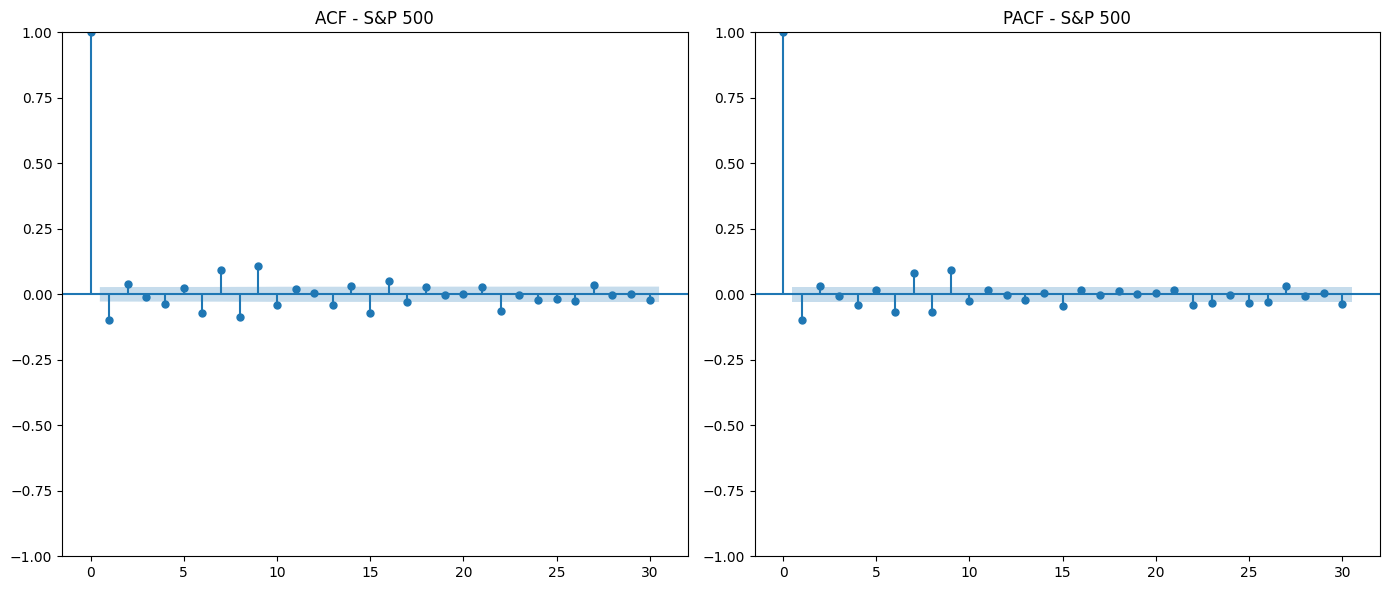

In [27]:
# Plot ACF and PACF for S&P 500 (1st differenced)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(sp_diff, lags=30, ax=plt.gca())
plt.title("ACF - S&P 500")

plt.subplot(1, 2, 2)
plot_pacf(sp_diff, lags=30, ax=plt.gca(), method="ywm")
plt.title("PACF - S&P 500")

plt.tight_layout()
plt.show()

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(0,1,1) for Nifty 500
nifty_model = ARIMA(nifty500_data['Close'], order=(0, 1, 1))
nifty_result = nifty_model.fit()
print("ARIMA(0,1,1) Summary - Nifty 500:")
print(nifty_result.summary())

# Fit ARIMA(0,1,1) for S&P 500
sp_model = ARIMA(sp500_data['Close'], order=(0, 1, 1))
sp_result = sp_model.fit()
print("\nARIMA(0,1,1) Summary - S&P 500:")
print(sp_result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0,1,1) Summary - Nifty 500:
                               SARIMAX Results                                
Dep. Variable:                ^CRSLDX   No. Observations:                 4494
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -26264.431
Date:                Sun, 06 Apr 2025   AIC                          52532.862
Time:                        16:57:44   BIC                          52545.683
Sample:                             0   HQIC                         52537.380
                               - 4494                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0665      0.008      8.514      0.000       0.051       0.082
sigma2      7004.0452     61.069    114.690      0.000    6884.351    7123.739
Ljung-Box (L1) (Q)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA(0,1,1) Summary - S&P 500:
                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 5033
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -23662.230
Date:                Sun, 06 Apr 2025   AIC                          47328.461
Time:                        16:57:46   BIC                          47341.508
Sample:                             0   HQIC                         47333.032
                               - 5033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0895      0.006    -16.088      0.000      -0.100      -0.079
sigma2       711.1067      5.130    138.619      0.000     701.052     721.161
Ljung-Box (L1) (Q):

In [30]:
# Fit ARIMA(1,1,1) for Nifty 500
nifty_arima_111 = ARIMA(nifty500_data['Close'], order=(1, 1, 1)).fit()
print("ARIMA(1,1,1) Summary - Nifty 500:")
print(nifty_arima_111.summary())

# Fit ARIMA(1,1,1) for S&P 500
sp_arima_111 = ARIMA(sp500_data['Close'], order=(1, 1, 1)).fit()
print("\nARIMA(1,1,1) Summary - S&P 500:")
print(sp_arima_111.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,1) Summary - Nifty 500:
                               SARIMAX Results                                
Dep. Variable:                ^CRSLDX   No. Observations:                 4494
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26263.820
Date:                Sun, 06 Apr 2025   AIC                          52533.640
Time:                        17:04:53   BIC                          52552.871
Sample:                             0   HQIC                         52540.417
                               - 4494                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2218      0.104      2.125      0.034       0.017       0.426
ma.L1         -0.1538      0.105     -1.461      0.144      -0.360       0.052
sigma2      7002.3

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA(1,1,1) Summary - S&P 500:
                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 5033
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23658.520
Date:                Sun, 06 Apr 2025   AIC                          47323.039
Time:                        17:04:54   BIC                          47342.610
Sample:                             0   HQIC                         47329.896
                               - 5033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3285      0.047     -7.014      0.000      -0.420      -0.237
ma.L1          0.2334      0.049      4.771      0.000       0.138       0.329
sigma2       710.34

In [31]:
# Fit ARIMA(1,1,0) for Nifty 500
nifty_arima_110 = ARIMA(nifty500_data['Close'], order=(1, 1, 0)).fit()
print("\nARIMA(1,1,0) Summary - Nifty 500:")
print(nifty_arima_110.summary())

# Fit ARIMA(1,1,0) for S&P 500
sp_arima_110 = ARIMA(sp500_data['Close'], order=(1, 1, 0)).fit()
print("\nARIMA(1,1,0) Summary - S&P 500:")
print(sp_arima_110.summary())


ARIMA(1,1,0) Summary - Nifty 500:
                               SARIMAX Results                                
Dep. Variable:                ^CRSLDX   No. Observations:                 4494
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -26264.116
Date:                Sun, 06 Apr 2025   AIC                          52532.231
Time:                        17:05:23   BIC                          52545.052
Sample:                             0   HQIC                         52536.749
                               - 4494                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0685      0.008      8.727      0.000       0.053       0.084
sigma2      6998.6019     60.482    115.714      0.000    6880.060    7117.144
Ljung-Box (L1) (Q

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
import pandas as pd

# List of model results with names
model_comparisons = [
    ("Nifty 500", "ARIMA(0,1,1)", nifty_result),
    ("Nifty 500", "ARIMA(1,1,1)", nifty_arima_111),
    ("Nifty 500", "ARIMA(1,1,0)", nifty_arima_110),
    ("S&P 500", "ARIMA(0,1,1)", sp_result),
    ("S&P 500", "ARIMA(1,1,1)", sp_arima_111),
    ("S&P 500", "ARIMA(1,1,0)", sp_arima_110),
]

results_data = []

# Loop to extract values safely
for index, model_name, result in model_comparisons:
    sigma2 = result.params.get("sigma2", result.resid.var())

    results_data.append({
        "Index": index,
        "Model": model_name,
        "AIC": result.aic,
        "BIC": result.bic,
        "LogLik": result.llf,
        "Sigma²": sigma2
    })

# Convert to DataFrame and sort
comparison_df = pd.DataFrame(results_data)
comparison_df = comparison_df.sort_values(by=["Index", "AIC"])

# Print final comparison
print(comparison_df.to_string(index=False))


    Index        Model          AIC          BIC        LogLik      Sigma²
Nifty 500 ARIMA(1,1,0) 52532.231187 52545.051739 -26264.115594 6998.601864
Nifty 500 ARIMA(0,1,1) 52532.862222 52545.682774 -26264.431111 7004.045203
Nifty 500 ARIMA(1,1,1) 52533.640325 52552.871152 -26263.820162 7002.369881
  S&P 500 ARIMA(1,1,1) 47323.039364 47342.610082 -23658.519682  710.349589
  S&P 500 ARIMA(1,1,0) 47325.329796 47338.376942 -23660.664898  710.768245
  S&P 500 ARIMA(0,1,1) 47328.460810 47341.507956 -23662.230405  711.106680


In [ ]:
# Nifty 500 → ARIMA(1,1,0) is the best

# S&P 500 → ARIMA(1,1,1) is the best

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


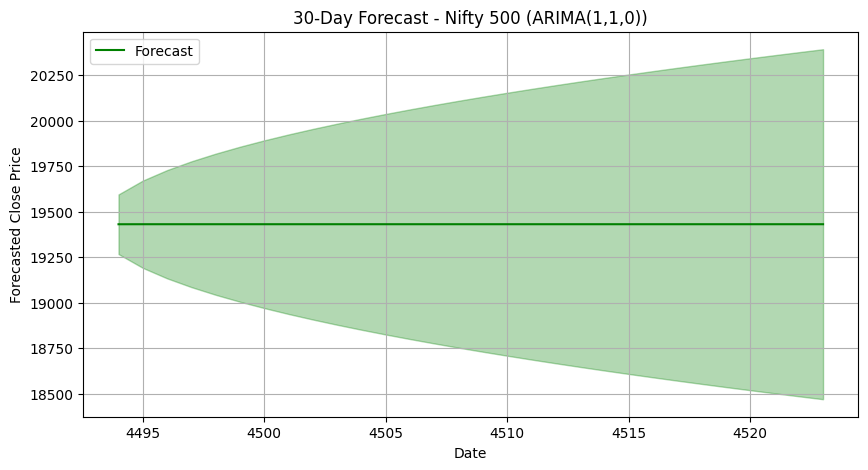

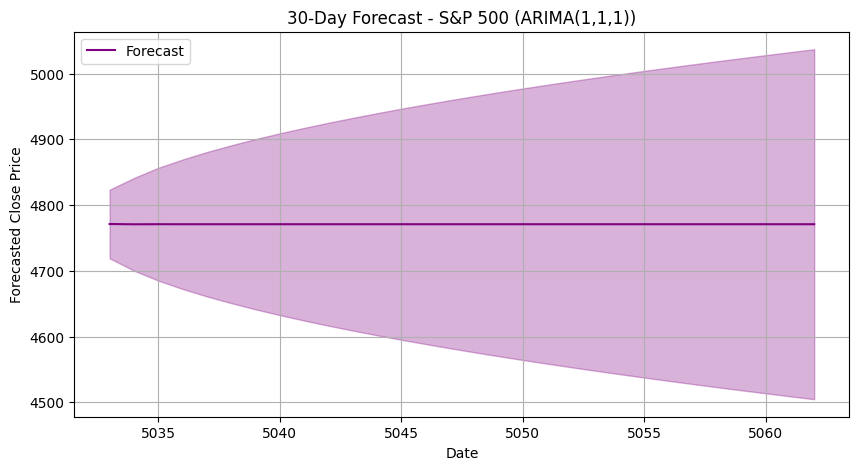

In [38]:

# Define forecast steps
forecast_steps = 30

# Refit best models
nifty_model_110 = ARIMA(nifty500_data['Close'], order=(1, 1, 0))
nifty_result_110 = nifty_model_110.fit()

sp_model_111 = ARIMA(sp500_data['Close'], order=(1, 1, 1))
sp_result_111 = sp_model_111.fit()

# Forecast for Nifty 500 (ARIMA(1,1,0))
nifty_forecast = nifty_result_110.get_forecast(steps=forecast_steps)
nifty_pred = nifty_forecast.predicted_mean
nifty_conf = nifty_forecast.conf_int()

# Forecast for S&P 500 (ARIMA(1,1,1))
sp_forecast = sp_result_111.get_forecast(steps=forecast_steps)
sp_pred = sp_forecast.predicted_mean
sp_conf = sp_forecast.conf_int()

# Plot Nifty 500 forecast only
plt.figure(figsize=(10, 5))
plt.plot(nifty_pred.index, nifty_pred, label='Forecast', color='green')
plt.fill_between(nifty_conf.index, nifty_conf.iloc[:, 0], nifty_conf.iloc[:, 1], color='green', alpha=0.3)
plt.title('30-Day Forecast - Nifty 500 (ARIMA(1,1,0))')
plt.xlabel('Date')
plt.ylabel('Forecasted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot S&P 500 forecast only
plt.figure(figsize=(10, 5))
plt.plot(sp_pred.index, sp_pred, label='Forecast', color='purple')
plt.fill_between(sp_conf.index, sp_conf.iloc[:, 0], sp_conf.iloc[:, 1], color='purple', alpha=0.3)
plt.title('30-Day Forecast - S&P 500 (ARIMA(1,1,1))')
plt.xlabel('Date')
plt.ylabel('Forecasted Close Price')
plt.legend()
plt.grid(True)
plt.show()


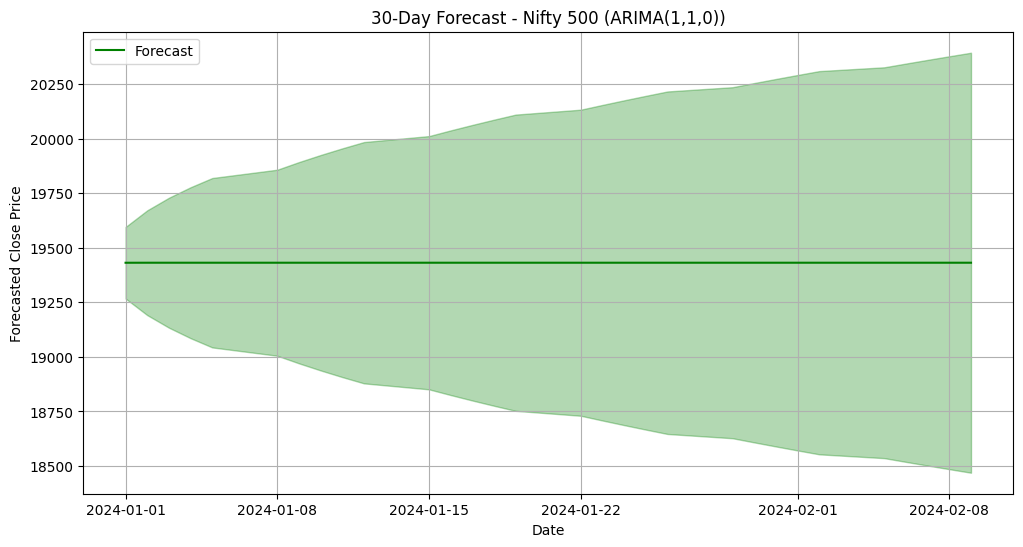

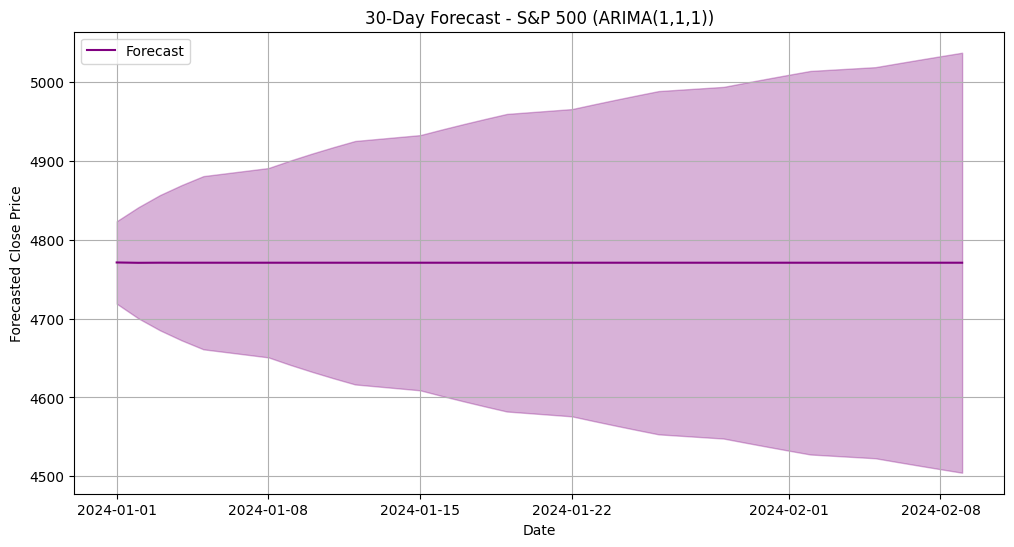

In [39]:
# Get the last date from the original data
nifty_last_date = nifty500_data.index[-1]
sp_last_date = sp500_data.index[-1]

# Create future dates for forecast steps
nifty_forecast_dates = pd.date_range(start=nifty_last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
sp_forecast_dates = pd.date_range(start=sp_last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Plot Nifty 500 forecast with real dates
plt.figure(figsize=(12, 6))
plt.plot(nifty_forecast_dates, nifty_pred, label='Forecast', color='green')
plt.fill_between(nifty_forecast_dates, nifty_conf.iloc[:, 0], nifty_conf.iloc[:, 1], color='green', alpha=0.3)
plt.title('30-Day Forecast - Nifty 500 (ARIMA(1,1,0))')
plt.xlabel("Date")
plt.ylabel("Forecasted Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot S&P 500 forecast with real dates
plt.figure(figsize=(12, 6))
plt.plot(sp_forecast_dates, sp_pred, label='Forecast', color='purple')
plt.fill_between(sp_forecast_dates, sp_conf.iloc[:, 0], sp_conf.iloc[:, 1], color='purple', alpha=0.3)
plt.title('30-Day Forecast - S&P 500 (ARIMA(1,1,1))')
plt.xlabel("Date")
plt.ylabel("Forecasted Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Split: Last 30 days as test, rest as training
nifty_train = nifty500_data['Close'][:-30]
nifty_test = nifty500_data['Close'][-30:]

sp_train = sp500_data['Close'][:-30]
sp_test = sp500_data['Close'][-30:]


In [42]:
# Fit ARIMA models on the training set
from statsmodels.tsa.arima.model import ARIMA

nifty_model = ARIMA(nifty_train, order=(1, 1, 0))
nifty_result = nifty_model.fit()

sp_model = ARIMA(sp_train, order=(1, 1, 1))
sp_result = sp_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
# forecast

nifty_forecast = nifty_result.get_forecast(steps=30).predicted_mean
sp_forecast = sp_result.get_forecast(steps=30).predicted_mean


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Nifty 500 forecast accuracy
nifty_rmse = np.sqrt(mean_squared_error(nifty_test, nifty_forecast))
nifty_mae = mean_absolute_error(nifty_test, nifty_forecast)
nifty_mape = np.mean(np.abs((nifty_test - nifty_forecast) / nifty_test)) * 100

# S&P 500 forecast accuracy
sp_rmse = np.sqrt(mean_squared_error(sp_test, sp_forecast))
sp_mae = mean_absolute_error(sp_test, sp_forecast)
sp_mape = np.mean(np.abs((sp_test - sp_forecast) / sp_test)) * 100

print("Nifty 500 - RMSE:", nifty_rmse, " MAE:", nifty_mae, " MAPE:", nifty_mape)
print("S&P 500 - RMSE:", sp_rmse, " MAE:", sp_mae, " MAPE:", sp_mape)


Nifty 500 - RMSE: 1161.5728178955821  MAE: 975.1791096236773  MAPE: nan
S&P 500 - RMSE: 164.174874024402  MAE: 134.4393612756203  MAPE: nan


In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
# Split the data into train-test (last 30 days as test)
forecast_steps = 30

nifty_train = nifty500_data['Close'][:-forecast_steps]
nifty_test = nifty500_data['Close'][-forecast_steps:]

sp_train = sp500_data['Close'][:-forecast_steps]
sp_test = sp500_data['Close'][-forecast_steps:]


In [50]:
# SARIMA for Nifty 500
nifty_model = SARIMAX(nifty_train, order=(1,1,1), seasonal_order=(1,1,1,12))
nifty_result = nifty_model.fit()

# SARIMA for S&P 500
sp_model = SARIMAX(sp_train, order=(1,1,1), seasonal_order=(1,1,1,12))
sp_result = sp_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


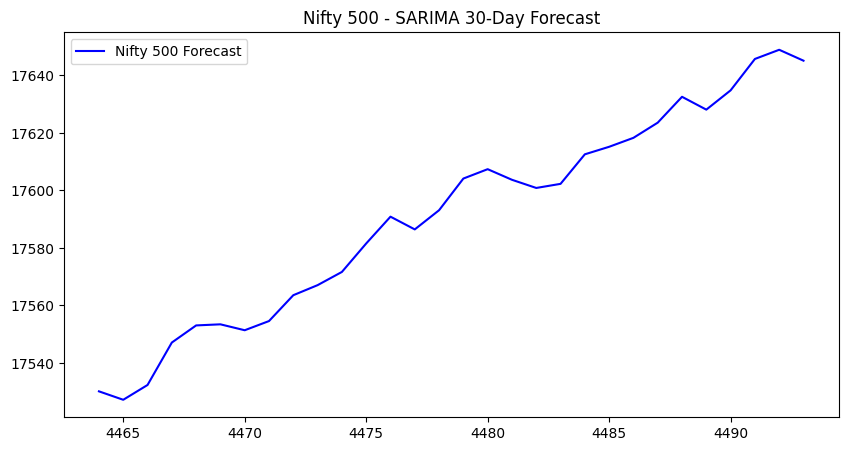

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


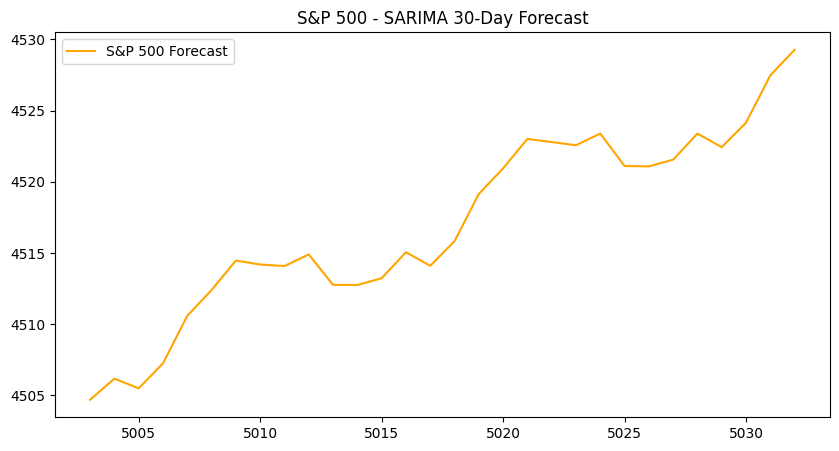

In [51]:
# Nifty forecast
nifty_forecast = nifty_result.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 5))
plt.plot(nifty_forecast, label='Nifty 500 Forecast', color='blue')
plt.title('Nifty 500 - SARIMA 30-Day Forecast')
plt.legend()
plt.show()

# S&P forecast
sp_forecast = sp_result.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 5))
plt.plot(sp_forecast, label='S&P 500 Forecast', color='orange')
plt.title('S&P 500 - SARIMA 30-Day Forecast')
plt.legend()
plt.show()


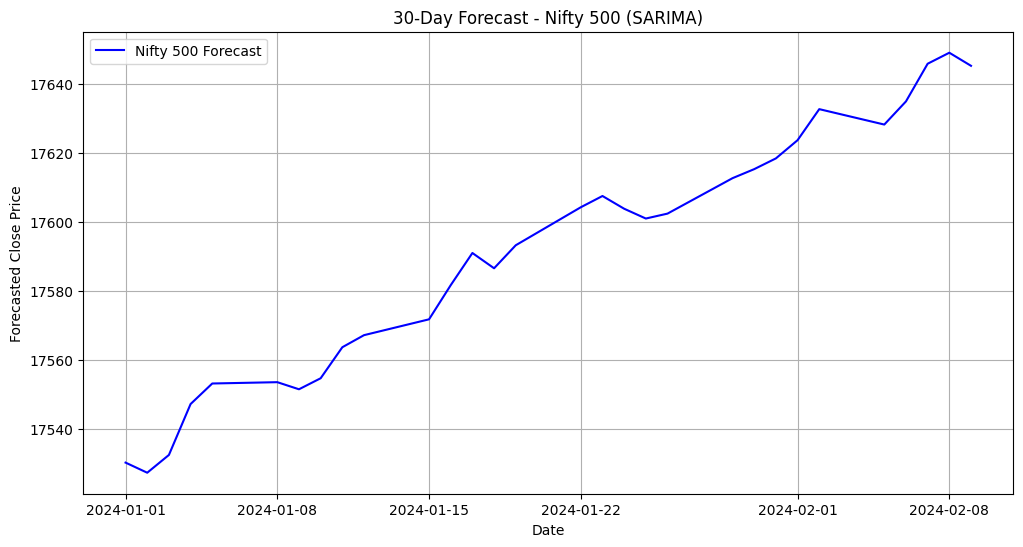

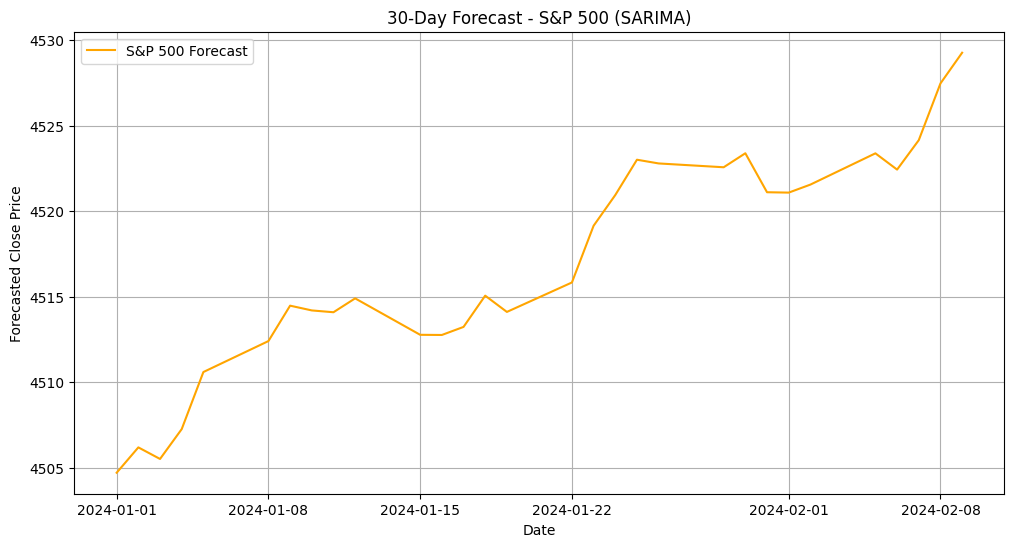

In [54]:
# Get the last date from the original data
last_nifty_date = nifty500_data.index[-1]
last_sp_date = sp500_data.index[-1]

# Generate future dates
nifty_forecast_dates = pd.date_range(start=last_nifty_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
sp_forecast_dates = pd.date_range(start=last_sp_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Plot Nifty 500 with forecast dates
plt.figure(figsize=(12, 6))
plt.plot(nifty_forecast_dates, nifty_forecast, label='Nifty 500 Forecast', color='blue')
plt.title('30-Day Forecast - Nifty 500 (SARIMA)')
plt.xlabel("Date")
plt.ylabel("Forecasted Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot S&P 500 with forecast dates
plt.figure(figsize=(12, 6))
plt.plot(sp_forecast_dates, sp_forecast, label='S&P 500 Forecast', color='orange')
plt.title('30-Day Forecast - S&P 500 (SARIMA)')
plt.xlabel("Date")
plt.ylabel("Forecasted Close Price")
plt.legend()
plt.grid(True)
plt.show()



In [55]:
# Evaluation
nifty_rmse = np.sqrt(mean_squared_error(nifty_test, nifty_forecast))
nifty_mae = mean_absolute_error(nifty_test, nifty_forecast)

sp_rmse = np.sqrt(mean_squared_error(sp_test, sp_forecast))
sp_mae = mean_absolute_error(sp_test, sp_forecast)

print(f"Nifty 500 - RMSE: {nifty_rmse}, MAE: {nifty_mae}")
print(f"S&P 500 - RMSE: {sp_rmse}, MAE: {sp_mae}")

Nifty 500 - RMSE: 1084.0472028293061, MAE: 905.1448021384643
S&P 500 - RMSE: 150.04350948406437, MAE: 121.27670204691437


In [56]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [57]:
# data preparation function

def prepare_data(df, window_size=60):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[['Close']])

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i - window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y, scaler

In [58]:
# define and train lstm model

def build_lstm():
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [59]:
#forecasting function

def forecast_lstm(model, data, window_size, steps, scaler):
    last_window = data[-window_size:]
    forecast = []

    for _ in range(steps):
        pred_input = last_window.reshape(1, window_size, 1)
        pred = model.predict(pred_input, verbose=0)
        forecast.append(pred[0][0])
        last_window = np.append(last_window[1:], pred)

    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()
    return forecast


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0392
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.8973e-04
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7309e-04
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7065e-04
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.5092e-04
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4691e-04
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.2568e-04
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2593e-04
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.3552e-04
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 1.2708e-04
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.1474e-04
Epoch 12/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0356e-04
Epoch 13/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.1836e-04
Epoch 14/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.1309e-04
Ep

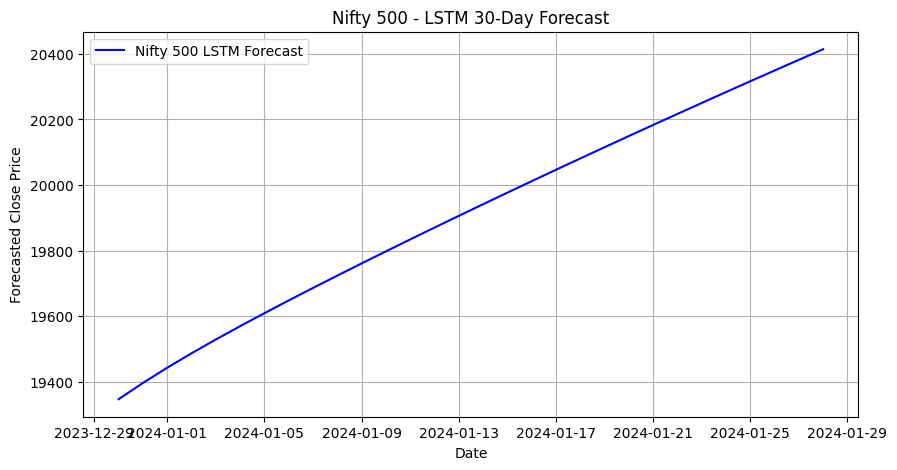

In [60]:
#for nifty 500

window_size = 60
forecast_steps = 30

# Prepare data
nifty_X, nifty_y, nifty_scaler = prepare_data(nifty500_data, window_size)

# Train model
nifty_model = build_lstm()
nifty_model.fit(nifty_X, nifty_y, epochs=20, batch_size=32, verbose=1)

# Forecast
nifty_input = nifty_scaler.transform(nifty500_data[['Close']])[:, 0]
nifty_forecast = forecast_lstm(nifty_model, nifty_input, window_size, forecast_steps, nifty_scaler)

# Plot
forecast_dates = pd.date_range(start=nifty500_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, nifty_forecast, label='Nifty 500 LSTM Forecast', color='blue')
plt.title('Nifty 500 - LSTM 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Close Price')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0206
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.6865e-04
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6413e-04
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.5541e-04
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.4991e-04
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.4119e-04
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.3099e-04
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.4020e-04
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 1.4606e-04
Epoch 10/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.2190e-04
Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.1737e-04
Epoch 12/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.2749e-04
Epoch 13/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.0506e-04
Epoch 14/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 1.0481e-04


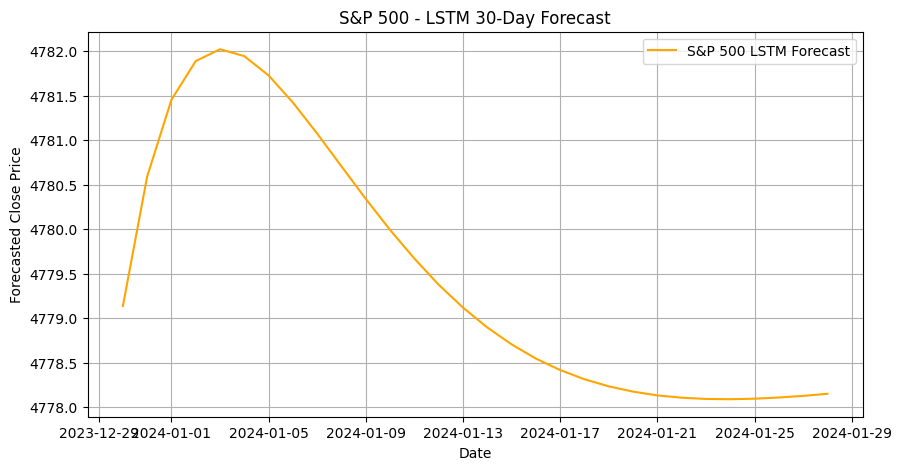

In [61]:
# Prepare data for S&P 500
sp_X, sp_y, sp_scaler = prepare_data(sp500_data, window_size)

# Train model
sp_model = build_lstm()
sp_model.fit(sp_X, sp_y, epochs=20, batch_size=32, verbose=1)

# Forecast
sp_input = sp_scaler.transform(sp500_data[['Close']])[:, 0]
sp_forecast = forecast_lstm(sp_model, sp_input, window_size, forecast_steps, sp_scaler)

# Plot
sp_forecast_dates = pd.date_range(start=sp500_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
plt.figure(figsize=(10, 5))
plt.plot(sp_forecast_dates, sp_forecast, label='S&P 500 LSTM Forecast', color='orange')
plt.title('S&P 500 - LSTM 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# NIFTY 500
nifty_test = nifty500_data['Close'].iloc[-forecast_steps:].values
nifty_test = nifty_test[:len(nifty_forecast)]

nifty_lstm_rmse = np.sqrt(mean_squared_error(nifty_test, nifty_forecast))
nifty_lstm_mae = mean_absolute_error(nifty_test, nifty_forecast)

print(f"Nifty 500 LSTM - RMSE: {nifty_lstm_rmse:.2f}, MAE: {nifty_lstm_mae:.2f}")

# S&P 500
sp_test = sp500_data['Close'].iloc[-forecast_steps:].values
sp_test = sp_test[:len(sp_forecast)]

sp_lstm_rmse = np.sqrt(mean_squared_error(sp_test, sp_forecast))
sp_lstm_mae = mean_absolute_error(sp_test, sp_forecast)

print(f"S&P 500 LSTM - RMSE: {sp_lstm_rmse:.2f}, MAE: {sp_lstm_mae:.2f}")

Nifty 500 LSTM - RMSE: 1454.86, MAE: 1414.58
S&P 500 LSTM - RMSE: 170.40, MAE: 141.78


SARIMA provides more accurate short-term forecasts based on RMSE and MAE.
